## INFO 2950 Final Project
Larrisa Chen (lc949), Michelle Li (myl39), Christina Jin (cej65), Jade Eggleston (jce76)

### Research question
***Do the criteria for a successful Airbnb differ in U.S. regions?***

Where success is defined as:
- high number of bookings combined with high listing rating

and criteria is defined by:
- Price
- Number of Beds
- Number of Baths
- Host ratings
- Number of reviews 
- Private or Public
- Proximity to urban center (most popular neighborhood)
- Neighborhood
- Keywords in names
- Keywords in description
- Host response rate / time
- Room type
- Amenities (binary)
    - varies by region

The list of amenities is scraped from each of the cities listed below and aggregated to find the top 15 in each region. 

Ultimately, we want to deduce the attributes that contribute to a successful Airbnb listing and compare these listings across different regions in the U.S. (Northeast, Southeast, Southeast, West, Northwest, and Midwest).


### Data Origin/Description

Our data is sourced from http://insideairbnb.com/get-the-data/.

We aggregated data from cities which receive the highest number of inbound tourism in each region from *link*.
The cities being analyzed are as follows:
- New England: Boston
- Middle Atlantic: New York City
- East North Central: Chicago
- West North Central: Minneapolis
- South Atlantic: Miami
- East South Central: Nashville
- West South Central: San Antonio
- Mountain: Las Vegas
- Pacific: Los Angeles



For each city, we want to analyze:
- Lisitng data with columns:
    - id
    - name
    - description
    - host_since
    - host_about
    - host_response_time
    - host_response_rate
    - host_acceptance_rate
    - host_is_superhost
    - host_listings_count
    - host_has_profile_pic
    - host_identity_verified
    - neighbourhood_cleansed
    - neighbourhood_group_cleansed
    - room_type
    - accommodates
    - bathrooms_text
    - bedrooms
    - beds
    - amenities
    - price
    - minimum_nights
    - maximum_nights
    - number_of_reviews
    - last_review
    - review_scores_rating
    - instant_bookable

- and booking data with columns:
    - list columns here


### Data Collection & Cleaning

We begin by removing all rows which contain NaN, so that analyzation can take place where all columns are one type.

Then, we analyze the columns and manually delete the following:
- listing_url
    - Repetitive data 
- Maximum_maximum_nights
    - Repetitive data
- Minimum_nights_avg_ntm
    - Repetitive data
- Maximum_nights_avg_ntm
    - Repetitive data
- Calendar_updated
    - Only contains empty data
- Has_availability
    - All true, redundent
- availability_30
    - Assuming users only evaluate criteria for listings that are available
- availability_60
    - Assuming users only evaluate criteria for listings that are available
- availability_90
    - Assuming users only evaluate criteria for listings that are available
- Availability_365
    - Assuming users only evaluate criteria for listings that are available
- calendar_last_scraped
- Number_of_reviews_ltm
    - Correlated to number_of_reviews, redundant
- Number_of_reviews_l30d
    - Correlated to number_of_reviews, redundant
- First_review
    - Redundant information because we have host_since
- Review_scores_accuracy
    - Correlated to review_scores_rating
- Review_scores_cleanliness
    - Correlated to review_scores_rating
- Review_scores_checkin
    - Correlated to review_scores_rating
- Review_scores_communication
    - Correlated to review_scores_rating
- Review_scores_location
    - Correlated to review_scores_rating
- Review_scores_value
    - Correlated to review_scores_rating
- License
    - Only contains empty data
- calculated_host_listings_count
- Calculated_host_listings_count_entire_homes
    - Information about host’s other listings are not relevant to this listing
- Calculated_host_listings_count_private_rooms
    - Information about host’s other listings are not relevant to this listing
- Calculated_host_listings_count_shared_rooms
    - Information about host’s other listings are not relevant to this listing
- Reviews_per_month
    - Too dependent on other people’s stay time, irrelevant metric 
- Neighbourhood_group_cleansed
    - Inconsistent across different cities
- House_availability
    - If listing is unavailable, users will not view it and it will by default not be the best listing


In [1]:
import numpy as np
import pandas as pd
import regex as re
import json

import ast
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def percent_to_float(x):
    return float(x.strip("%"))/100.0

def dollar_to_float(x):
    x = x.replace(",", "")
    x = x.replace("$", "")
    return float(x)

def str_to_bool(x):
    if(x == "f"):
        return False
    else:
        return True
    
def room_type_to_bool(x):
    if(x == "Shared room"):
        return False
    return True

def bathrooms_text_to_bool(x):
    if(str(x).find("shared") != -1 or str(x).find("Shared") != -1):
        return False
    return True
    
def amenities_to_list(x):
    return json.loads(x)
    
def host_response_time_to_int(x):
    if(x == "within an hour"):
        return 0
    elif(x == "within a few hours"):
        return 1
    elif(x == "within a day"):
        return 2
    elif(x == "a few days or more"):
        return 3
    elif(x == "None"):
        return 4
    
def bathroom_text_to_float(x):
    if(x.find("half-bath") != -1 or x.find("Half-bath") != -1):
        return 0.5
    elif(re.search(r"d+\.\d+", x) != None):
        return float(re.search(r"d+\.\d+", x).group())
    return int(re.search(r"\d+", x).group())

def is_string(x):
    for letter in x:
        if((letter >= "A" and letter <= "Z") or (letter >= "a" and letter <="z") or (letter >= "0" and letter <= "9")):
            return True;
    return False;

nyc_listings_df = pd.read_csv("nyc_listings.csv")

nyc_listings_df = nyc_listings_df[nyc_listings_df["host_about"].notna()]
nyc_listings_df = nyc_listings_df[nyc_listings_df["host_response_time"].notna()]
nyc_listings_df = nyc_listings_df[nyc_listings_df["host_response_rate"].notna()]
nyc_listings_df = nyc_listings_df[nyc_listings_df["host_acceptance_rate"].notna()]
nyc_listings_df = nyc_listings_df[nyc_listings_df["last_review"].notna()]
nyc_listings_df = nyc_listings_df[nyc_listings_df["review_scores_rating"].notna()]
nyc_listings_df = nyc_listings_df[nyc_listings_df["description"].notna()]
nyc_listings_df = nyc_listings_df[nyc_listings_df["beds"].notna()]
nyc_listings_df = nyc_listings_df[nyc_listings_df["bedrooms"].notna()]
nyc_listings_df = nyc_listings_df[nyc_listings_df["bathrooms_text"].notna()]

nyc_listings_df = nyc_listings_df[nyc_listings_df["host_about"].apply(is_string)]
nyc_listings_df = nyc_listings_df[nyc_listings_df["name"].apply(is_string)]
nyc_listings_df = nyc_listings_df[nyc_listings_df["description"].apply(is_string)]

nyc_listings_df["host_response_rate"] = nyc_listings_df["host_response_rate"].apply(percent_to_float)
nyc_listings_df["host_acceptance_rate"] = nyc_listings_df["host_acceptance_rate"].apply(percent_to_float)
nyc_listings_df["price"] = nyc_listings_df["price"].apply(dollar_to_float)
nyc_listings_df["instant_bookable"] = nyc_listings_df["instant_bookable"].apply(str_to_bool)
nyc_listings_df["host_identity_verified"] = nyc_listings_df["host_identity_verified"].apply(str_to_bool)
nyc_listings_df["host_has_profile_pic"] = nyc_listings_df["host_has_profile_pic"].apply(str_to_bool)
nyc_listings_df["host_is_superhost"] = nyc_listings_df["host_is_superhost"].apply(str_to_bool)
nyc_listings_df["host_response_time"] = nyc_listings_df["host_response_time"].apply(host_response_time_to_int)
nyc_listings_df["amenities"] = nyc_listings_df["amenities"].apply(amenities_to_list)

nyc_listings_df = nyc_listings_df.rename(columns={"room_type": "is_private_room"})
nyc_listings_df["is_private_room"] = nyc_listings_df["is_private_room"].apply(room_type_to_bool)
nyc_listings_df["is_private_bath"] = nyc_listings_df["bathrooms_text"].apply(bathrooms_text_to_bool)
nyc_listings_df = nyc_listings_df.rename(columns={"bathrooms_text": "baths"})
nyc_listings_df["baths"] = nyc_listings_df["baths"].apply(bathroom_text_to_float)
nyc_listings_df["is_private_overall"] = nyc_listings_df["is_private_room"] & nyc_listings_df["is_private_bath"]

nyc_listings_df["host_since"] = pd.to_datetime(nyc_listings_df["host_since"])
nyc_listings_df["last_review"] = pd.to_datetime(nyc_listings_df["last_review"])

print(nyc_listings_df.dtypes)
print(nyc_listings_df.shape)
print(nyc_listings_df)

nyc_calendar_df = pd.read_csv("nyc_calendar.csv")
nyc_calendar_df = nyc_calendar_df.drop("price", axis=1)
nyc_calendar_df = nyc_calendar_df.drop("adjusted_price", axis=1)
nyc_calendar_df["date"] = pd.to_datetime(nyc_calendar_df["date"])
nyc_calendar_df["available"] = nyc_calendar_df["available"].apply(str_to_bool)

print(nyc_calendar_df)
print(nyc_calendar_df.dtypes)

id                               float64
name                              object
description                       object
host_since                datetime64[ns]
host_about                        object
host_response_time                 int64
host_response_rate               float64
host_acceptance_rate             float64
host_is_superhost                   bool
host_listings_count              float64
host_has_profile_pic                bool
host_identity_verified              bool
neighbourhood_cleansed            object
is_private_room                     bool
accommodates                       int64
baths                            float64
bedrooms                         float64
beds                             float64
amenities                         object
price                            float64
minimum_nights                     int64
maximum_nights                     int64
number_of_reviews                  int64
last_review               datetime64[ns]
review_scores_ra

In [3]:
%load_ext sql

%config SqlMagic.autopandas = True
%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False

%sql duckdb:///:memory:

In [4]:
%sql nyc_bookings_df << (SELECT listing_id, COUNT(available) AS days_booked FROM nyc_calendar_df WHERE available = False GROUP BY listing_id)
%sql nyc_combined_df << (SELECT * FROM nyc_listings_df LEFT JOIN nyc_bookings_df ON nyc_listings_df.id = nyc_bookings_df.listing_id)
%sql nyc_listings_df << SELECT * FROM nyc_listings_df ORDER BY price 
%sql nyc_combined_df << SELECT * FROM nyc_combined_df ORDER BY price 
%sql nyc_price_reviews_df << SELECT AVG(price) as average_price, review_scores_rating FROM nyc_combined_df GROUP BY review_scores_rating ORDER BY review_scores_rating
%sql nyc_review_booking_df << SELECT SUM(days_booked) AS total_days_booked, review_scores_rating FROM nyc_combined_df GROUP BY review_scores_rating
%sql nyc_price_booking_df << SELECT days_booked, price FROM nyc_combined_df GROUP BY price, days_booked ORDER BY days_booked

Returning data to local variable nyc_bookings_df
Returning data to local variable nyc_combined_df
Returning data to local variable nyc_listings_df
Returning data to local variable nyc_combined_df
Returning data to local variable nyc_price_reviews_df
Returning data to local variable nyc_review_booking_df


In [7]:
%sql nyc_price_booking_df_1 << SELECT * FROM nyc_price_booking_df FETCH FIRST 4631 ROWS ONLY

Returning data to local variable nyc_price_booking_df_1


In [8]:
%sql nyc_price_booking_df << SELECT days_booked, price FROM nyc_combined_df GROUP BY price, days_booked ORDER BY days_booked DESC
%sql nyc_price_booking_df_2 << SELECT * FROM nyc_price_booking_df FETCH FIRST 4621 ROWS ONLY

Returning data to local variable nyc_price_booking_df
Returning data to local variable nyc_price_booking_df_2


In [10]:
nyc_combined_df = nyc_combined_df.drop(columns = 'listing_id')
nyc_listings_df = nyc_listings_df.drop([11094, 11095, 11096])
nyc_combined_df = nyc_combined_df.drop([11094, 11095, 11096])

#### NYC Amenity Scraping

In [11]:
nyc_amenities_df = pd.DataFrame(nyc_combined_df['amenities'])
nyc_amenities_list_accum = []
df_len = len(nyc_amenities_df.index)
for i in range(0,df_len):
    x = ast.literal_eval(nyc_amenities_df.iloc[i, 0])
    nyc_amenities_list_accum.append(x)
    i+=1

In [12]:
nyc_amenities_frequency={}
for list in nyc_amenities_list_accum:
    for item in list:
        if item in nyc_amenities_frequency:
            nyc_amenities_frequency[item] += 1
        else:
            nyc_amenities_frequency[item] = 1

In [13]:
nyc_amenities_df = pd.DataFrame(nyc_amenities_frequency, index=[0])
nyc_amenities_list = nyc_amenities_df.columns

In [14]:
nyc_amenities_df = pd.melt(nyc_amenities_df, value_vars=nyc_amenities_list, value_name='amenity_count')

In [15]:
%sql nyc_amenities_df << SELECT * FROM nyc_amenities_df ORDER BY amenity_count DESC FETCH FIRST 30 ROWS ONLY;

Returning data to local variable nyc_amenities_df


In [16]:
nyc_amenities_df

,variable,amenity_count
0,Smoke alarm,10555
1,Essentials,10143
2,Wifi,9964
3,Kitchen,9778
4,Long term stays allowed,9715
5,Carbon monoxide alarm,9687
6,Hangers,9498
7,Hot water,9273
8,Hair dryer,8944
9,Iron,8799


### Data Limitations


### Exploratory Data Analysis

In [14]:
import numpy as np
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt

In [15]:
%sql SELECT * FROM nyc_listings_df WHERE review_scores_rating IS NOT NULL ORDER BY review_scores_rating ASC 

,id,name,description,host_since,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,amenities,price,minimum_nights,maximum_nights,number_of_reviews,last_review,review_scores_rating,instant_bookable,is_private_bath,is_private_overall
0,3.388395e+07,New Building Room 6 from 1,"CLEAN, NEW ROOMS (BRAND NEW HOUSE):<br />Acces...",2018-07-18,"Cool, calm and collected!! ......"" I go out of...",0,0.90,0.88,False,6.0,...,"['First aid kit', 'Coffee maker', 'Long term s...",55.0,15,1125,2,2019-07-26,0.0,True,False,False
1,3.515857e+07,"Modern, Peaceful Room In Lively East Williamsb...",Sitting right on bustling Grand St in the up-a...,2016-02-17,"We are a privately-held, US-base technology co...",0,1.00,1.00,False,2.0,...,"['Essentials', 'Central air conditioning', 'El...",60.0,30,150,2,2020-03-10,0.0,True,False,False
2,1.597414e+07,100$,I am renting my super cozy and very spacious 1...,2015-09-29,A happy Brazilian girl leaving in the capitol ...,2,1.00,0.67,False,1.0,...,"['Hair dryer', 'Essentials', 'Hot water', 'Hea...",100.0,30,30,1,2018-01-07,0.0,False,False,False
3,2.758348e+07,River View!,"Spacious, neat, beautiful, and quiet one-bedro...",2013-01-02,"cool easy going,",1,1.00,0.00,False,1.0,...,"['Hair dryer', 'Essentials', 'Iron', 'Dishes a...",120.0,30,120,1,2018-08-08,0.0,False,True,True
4,3.292336e+07,"Guest Room in a Warm, friendly Artist's Home",Beautiful Artist's apartment situated on a tre...,2014-01-04,"making my way around the world, sprinkling lov...",3,0.00,0.00,False,1.0,...,"['Hair dryer', 'Essentials', 'Iron', 'Heating'...",155.0,30,1125,1,2019-09-17,0.0,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11089,6.331134e+17,HISTORIC $10MLN MANSION IN THE HEART OF PARK S...,ECCENTRIC SOPHISTICATED 18TH CENTURY MANSION<b...,2012-08-29,"Dear Travelers,\n\nWelcome to our exclusive co...",1,0.93,0.53,True,27.0,...,"['Microwave', 'Indoor fireplace', 'Stove', 'Co...",2400.0,3,365,1,2022-05-28,5.0,False,True,True
11090,1.440811e+07,Unparalleled Luxury in Midtown Manhattan,"Boasting unparalleled luxury, this one-bedroom...",2011-07-18,Henry prides himself on offering superb accomm...,0,1.00,1.00,False,14.0,...,"['Gym', 'Children’s dinnerware', 'Long term st...",2500.0,30,1125,4,2017-04-17,5.0,False,True,True
11091,3.448529e+07,"Horizon Suite w/ sofa bed, your sanctuary in SoHo",The Horizon Suite can accommodate up to four p...,2019-05-09,Welcome to 27 Grand Street Hotel\n\n27 Grand S...,1,1.00,0.88,False,2.0,...,"['Le Labo body soap', 'Coffee maker', 'Gym', '...",2500.0,1,28,2,2021-07-11,5.0,True,True,True
11092,1.585726e+07,5 Star Luxury 2 BR Suite Heart of Manhattan,Experience unparalleled luxury at the iconic S...,2015-01-22,We're Alyssa and Justin. We love to travel wit...,0,1.00,0.29,True,6.0,...,"['First aid kit', 'Microwave', 'Indoor firepla...",2799.0,2,90,9,2022-06-14,5.0,False,True,True


In [16]:
nyc_calendar_df.head()

,listing_id,date,available,minimum_nights,maximum_nights
0,2539,2022-09-07,False,30.0,730.0
1,2539,2022-09-08,False,30.0,730.0
2,2539,2022-09-09,False,30.0,730.0
3,2539,2022-09-10,False,30.0,730.0
4,2539,2022-09-11,False,30.0,730.0


In [17]:
%sql SELECT listing_id, COUNT(available) AS days_booked FROM nyc_calendar_df WHERE available = False GROUP BY listing_id ORDER BY days_booked DESC

,listing_id,days_booked
0,64015,366
1,18961,365
2,20913,365
3,25696,365
4,597624,365
...,...,...
39075,649239582021639044,1
39076,15495642,1
39077,547998622525410778,1
39078,36907176,1


### Questions for Reviewers

### Data Limitations


### Exploratory Data Analysis

In [18]:
%sql SELECT * FROM nyc_listings_df WHERE review_scores_rating IS NOT NULL ORDER BY review_scores_rating ASC 

,id,name,description,host_since,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,amenities,price,minimum_nights,maximum_nights,number_of_reviews,last_review,review_scores_rating,instant_bookable,is_private_bath,is_private_overall
0,3.388395e+07,New Building Room 6 from 1,"CLEAN, NEW ROOMS (BRAND NEW HOUSE):<br />Acces...",2018-07-18,"Cool, calm and collected!! ......"" I go out of...",0,0.90,0.88,False,6.0,...,"['First aid kit', 'Coffee maker', 'Long term s...",55.0,15,1125,2,2019-07-26,0.0,True,False,False
1,3.515857e+07,"Modern, Peaceful Room In Lively East Williamsb...",Sitting right on bustling Grand St in the up-a...,2016-02-17,"We are a privately-held, US-base technology co...",0,1.00,1.00,False,2.0,...,"['Essentials', 'Central air conditioning', 'El...",60.0,30,150,2,2020-03-10,0.0,True,False,False
2,1.597414e+07,100$,I am renting my super cozy and very spacious 1...,2015-09-29,A happy Brazilian girl leaving in the capitol ...,2,1.00,0.67,False,1.0,...,"['Hair dryer', 'Essentials', 'Hot water', 'Hea...",100.0,30,30,1,2018-01-07,0.0,False,False,False
3,2.758348e+07,River View!,"Spacious, neat, beautiful, and quiet one-bedro...",2013-01-02,"cool easy going,",1,1.00,0.00,False,1.0,...,"['Hair dryer', 'Essentials', 'Iron', 'Dishes a...",120.0,30,120,1,2018-08-08,0.0,False,True,True
4,3.292336e+07,"Guest Room in a Warm, friendly Artist's Home",Beautiful Artist's apartment situated on a tre...,2014-01-04,"making my way around the world, sprinkling lov...",3,0.00,0.00,False,1.0,...,"['Hair dryer', 'Essentials', 'Iron', 'Heating'...",155.0,30,1125,1,2019-09-17,0.0,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11089,6.331134e+17,HISTORIC $10MLN MANSION IN THE HEART OF PARK S...,ECCENTRIC SOPHISTICATED 18TH CENTURY MANSION<b...,2012-08-29,"Dear Travelers,\n\nWelcome to our exclusive co...",1,0.93,0.53,True,27.0,...,"['Microwave', 'Indoor fireplace', 'Stove', 'Co...",2400.0,3,365,1,2022-05-28,5.0,False,True,True
11090,1.440811e+07,Unparalleled Luxury in Midtown Manhattan,"Boasting unparalleled luxury, this one-bedroom...",2011-07-18,Henry prides himself on offering superb accomm...,0,1.00,1.00,False,14.0,...,"['Gym', 'Children’s dinnerware', 'Long term st...",2500.0,30,1125,4,2017-04-17,5.0,False,True,True
11091,3.448529e+07,"Horizon Suite w/ sofa bed, your sanctuary in SoHo",The Horizon Suite can accommodate up to four p...,2019-05-09,Welcome to 27 Grand Street Hotel\n\n27 Grand S...,1,1.00,0.88,False,2.0,...,"['Le Labo body soap', 'Coffee maker', 'Gym', '...",2500.0,1,28,2,2021-07-11,5.0,True,True,True
11092,1.585726e+07,5 Star Luxury 2 BR Suite Heart of Manhattan,Experience unparalleled luxury at the iconic S...,2015-01-22,We're Alyssa and Justin. We love to travel wit...,0,1.00,0.29,True,6.0,...,"['First aid kit', 'Microwave', 'Indoor firepla...",2799.0,2,90,9,2022-06-14,5.0,False,True,True


In [19]:
%sql SELECT listing_id, COUNT(available) AS days_booked FROM nyc_calendar_df WHERE available = 'f' GROUP BY listing_id ORDER BY days_booked DESC

,listing_id,days_booked
0,64015,366
1,1197899,365
2,1198874,365
3,1291245,365
4,1312228,365
...,...,...
39075,624508295836821889,1
39076,1755844,1
39077,10384214,1
39078,605721169816342867,1


In [20]:
#%sql nyc_amenities_df << SELECT * FROM nyc_amenities_df ORDER BY 

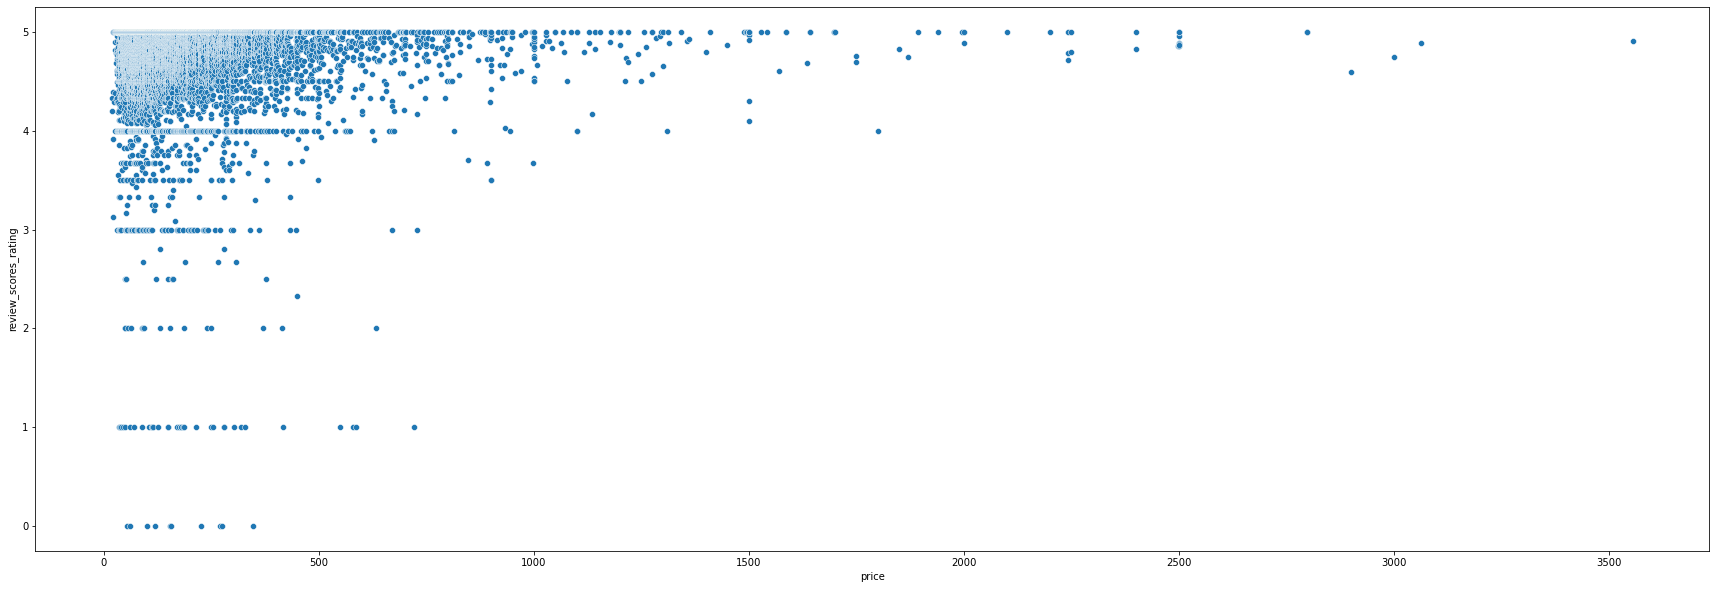

In [21]:
#x: price, y: reviews
fig, ax = plt.subplots(figsize=(30, 10))
sns.scatterplot(data=nyc_listings_df, x=nyc_listings_df["price"], y=nyc_listings_df["review_scores_rating"])
#plt.xticks(rotation=60)
plt.show()

In [40]:
#x: reviews, y: price
#sns.scatterplot(data=nyc_listings_df, x=nyc_listings_df["review_scores_rating"], y=nyc_listings_df["price"])
#the outlier is crazy i think we need to remove it (id = 11153)

In [41]:
#df = nyc_listings_df
#hist = df.hist(column='review_scores_rating')

In [42]:
#sns.scatterplot(data=nyc_listings_df, x=nyc_listings_df["review_scores_rating"], y=nyc_listings_df["price"])

In [37]:
#sns.scatterplot(data=nyc_combined_df, x=nyc_combined_df["price"], y=nyc_combined_df["days_booked"])

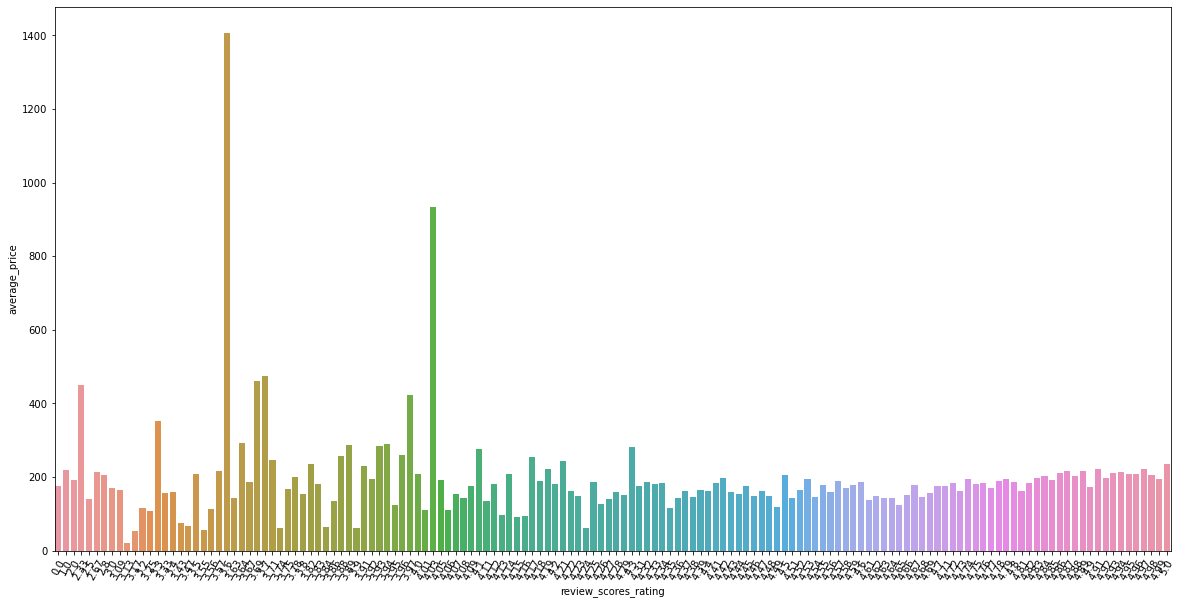

In [22]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(data=nyc_price_reviews_df, x="review_scores_rating", y="average_price", ax = ax)
plt.xticks(rotation=60)
plt.show()

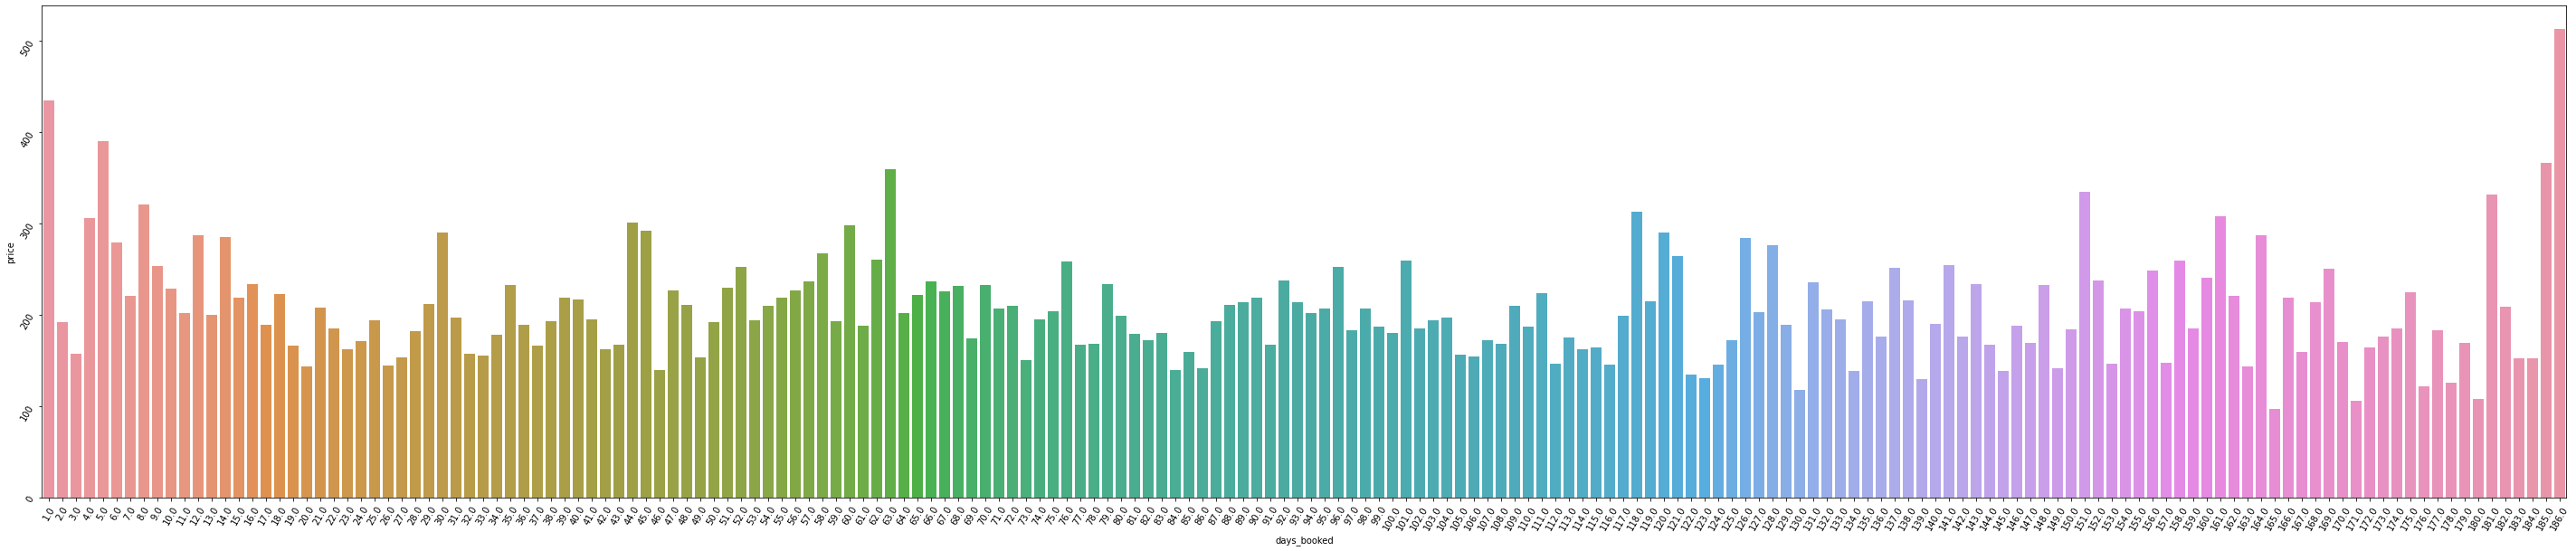

In [26]:
#split up
fig, ax = plt.subplots(figsize=(50, 10))
sns.barplot(data=nyc_price_booking_df_1, x="days_booked", y="price", ci=None, ax = ax)
plt.xticks(rotation=60)
plt.yticks(rotation=60)
plt.show()

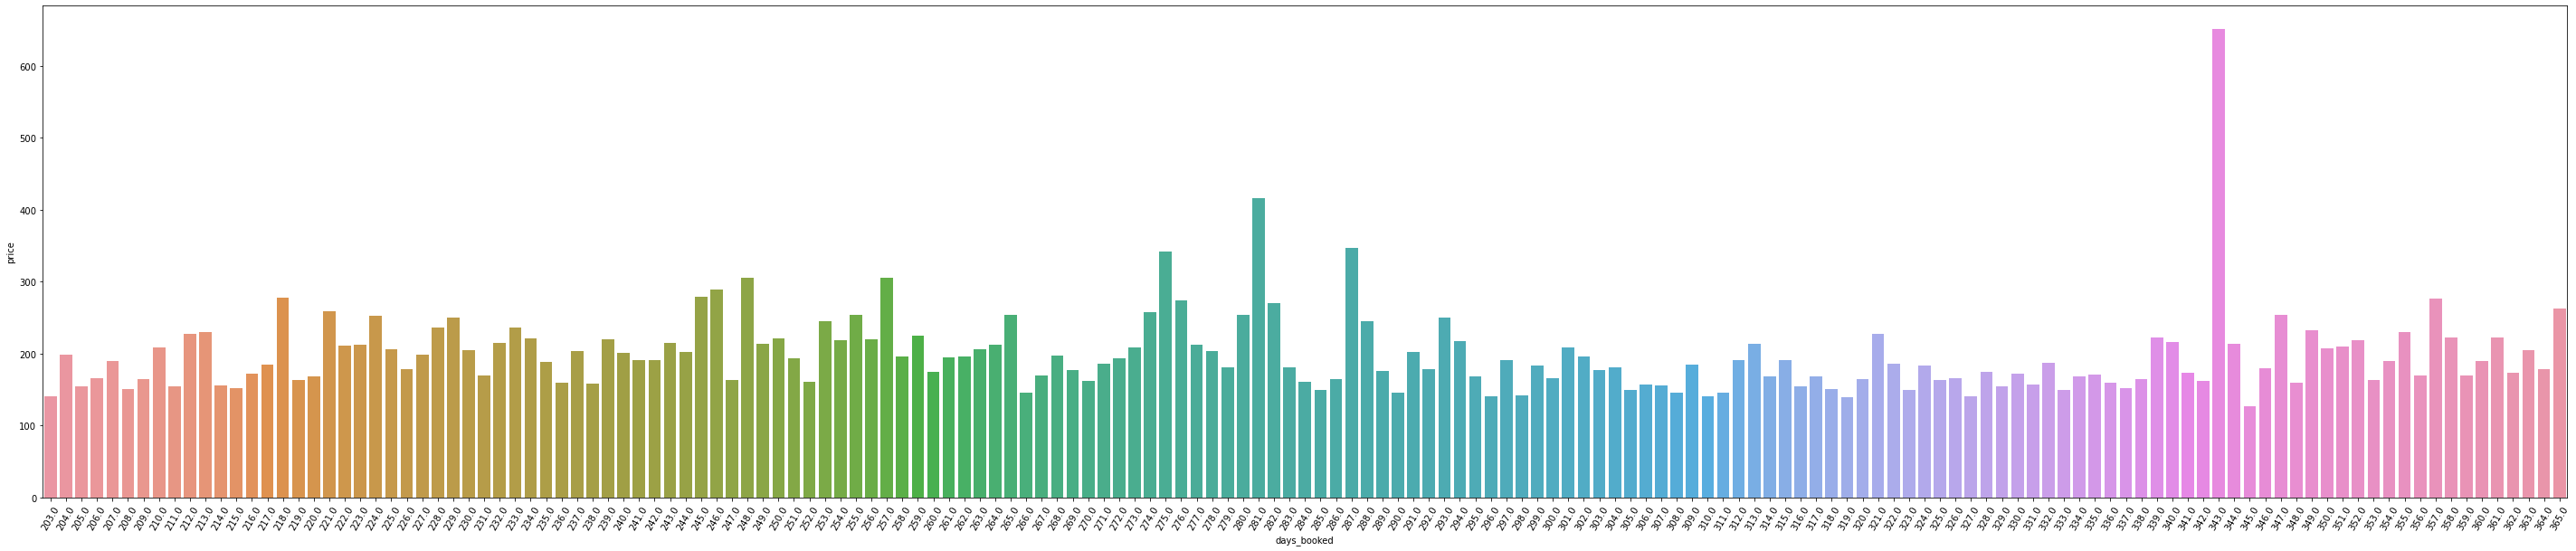

In [21]:
fig, ax = plt.subplots(figsize=(50, 10))
sns.barplot(data=nyc_price_booking_df_2, x="days_booked", y="price", ci = None, ax = ax)
plt.xticks(rotation=60)
plt.show()

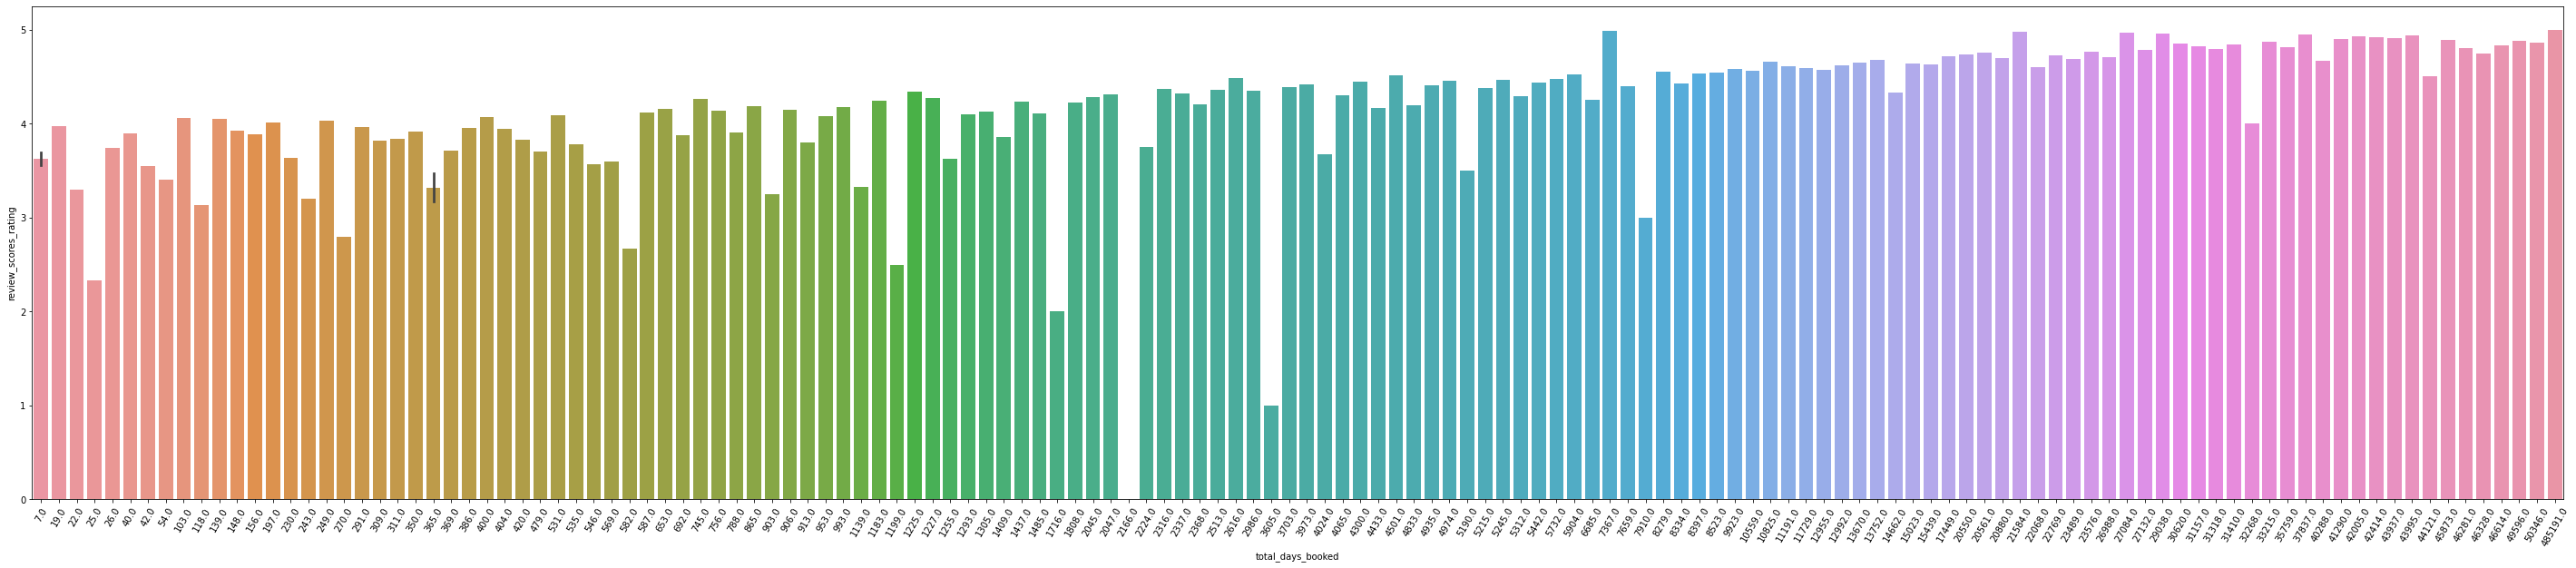

In [36]:
fig, ax = plt.subplots(figsize=(50, 10))
sns.barplot(data=nyc_review_booking_df, x="total_days_booked", y="review_scores_rating", ax = ax)
plt.xticks(rotation=60)
plt.show()

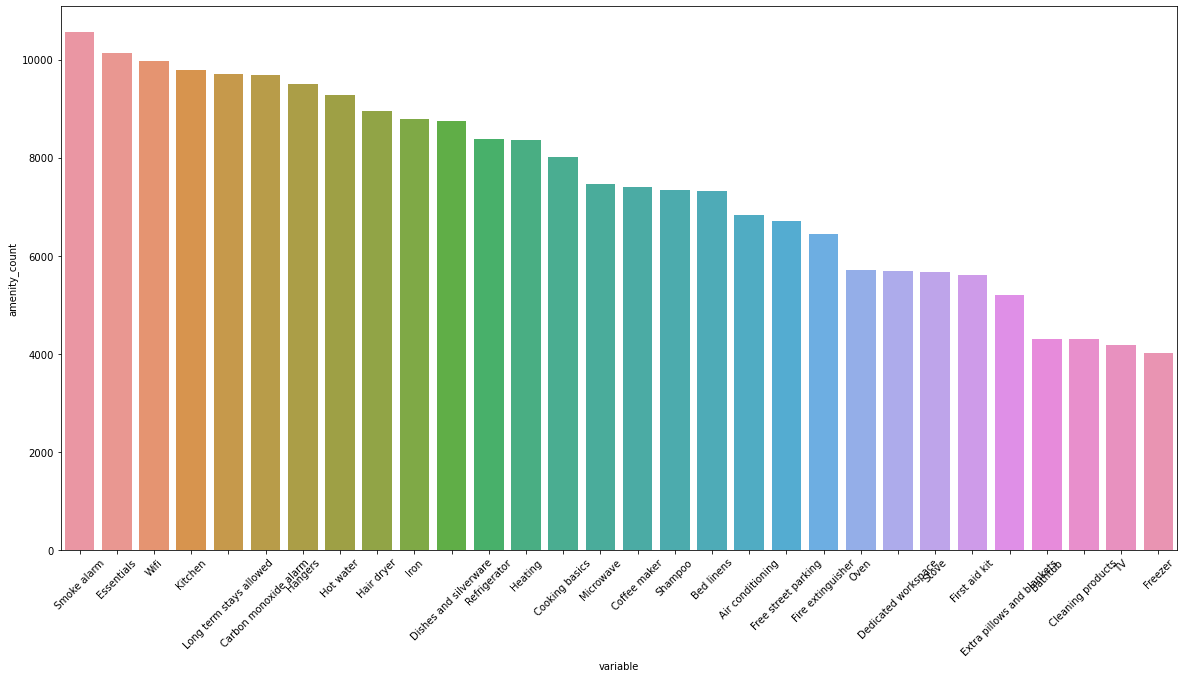

In [18]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(data=nyc_amenities_df, x="variable", y="amenity_count", ax = ax)
plt.xticks(rotation=45)
plt.show()

### Questions for Reviewers